In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from itertools import product
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [2]:
df = aux.load_data(Path("../results_synced/ratio/"))
#df.groupby(["dataset", "arch", "nsamp_tra", "nsamp_pre"]).count()
#df = df[df["fold_number"] == 1]
#df[df["pretrained"]]["target_best_model"].str.split("/").str[6].str.removeprefix("epoch=").str.split("-").str[0].astype(int).hist()
df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,target_train_csv,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_mse,pretrain_val_r2,pretrain_best_model,pretrain_train_csv,target_nepochs,pretrain_nepochs
0,GunPoint,CNN_DFS,False,3,0,128,5,1,0.518229,0.518229,...,training/2023-03-20_17-46_EXP_ratio_CNN_DFS_Gu...,1227,0,5985,NaN,NaN,NaN,NaN,0,NaN
1,GunPoint,CNN_DFS,True,3,0,128,5,1,0.518229,0.518229,...,training/2023-03-20_17-52_EXP_ratio_CNN_DFS_Gu...,1227,3627,5985,0.256009,0.934713,training/2023-03-20_17-52_EXP_ratio_CNN_DFS_Gu...,training/2023-03-20_17-52_EXP_ratio_CNN_DFS_Gu...,0,55
2,GunPoint,CNN_DFS,True,3,0,128,5,1,0.518229,0.518229,...,training/2023-03-20_18-03_EXP_ratio_CNN_DFS_Gu...,1227,7254,5985,0.174831,0.968827,training/2023-03-20_18-03_EXP_ratio_CNN_DFS_Gu...,training/2023-03-20_18-03_EXP_ratio_CNN_DFS_Gu...,0,58
3,GunPoint,CNN_DFS,True,3,0,128,5,1,0.518229,0.518229,...,training/2023-03-20_18-16_EXP_ratio_CNN_DFS_Gu...,1227,10881,5985,0.144847,0.978863,training/2023-03-20_18-16_EXP_ratio_CNN_DFS_Gu...,training/2023-03-20_18-16_EXP_ratio_CNN_DFS_Gu...,0,59
4,GunPoint,CNN_DFS,True,3,0,128,5,1,0.481771,0.481771,...,training/2023-03-20_18-32_EXP_ratio_CNN_DFS_Gu...,1227,14508,5985,0.114646,0.986765,training/2023-03-20_18-32_EXP_ratio_CNN_DFS_Gu...,training/2023-03-20_18-32_EXP_ratio_CNN_DFS_Gu...,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,GunPoint,CNN_DFS,True,2,0,128,5,1,0.585938,0.585938,...,training/2023-03-20_17-49_EXP_ratio_CNN_DFS_Gu...,2454,10881,5985,0.183003,0.966362,training/2023-03-20_17-49_EXP_ratio_CNN_DFS_Gu...,training/2023-03-20_17-49_EXP_ratio_CNN_DFS_Gu...,0,58
70,GunPoint,CNN_DFS,True,2,0,128,5,1,0.606771,0.606771,...,training/2023-03-20_18-02_EXP_ratio_CNN_DFS_Gu...,2454,14508,5985,0.192318,0.962887,training/2023-03-20_18-02_EXP_ratio_CNN_DFS_Gu...,training/2023-03-20_18-02_EXP_ratio_CNN_DFS_Gu...,110,56
71,GunPoint,CNN_DFS,True,2,0,128,5,1,0.524740,0.524740,...,training/2023-03-20_18-17_EXP_ratio_CNN_DFS_Gu...,2454,18135,5985,0.141459,0.979818,training/2023-03-20_18-17_EXP_ratio_CNN_DFS_Gu...,training/2023-03-20_18-17_EXP_ratio_CNN_DFS_Gu...,82,58
72,GunPoint,CNN_DFS,False,2,0,128,5,1,0.585938,0.585938,...,training/2023-03-20_18-33_EXP_ratio_CNN_DFS_Gu...,3681,0,5985,NaN,NaN,NaN,NaN,0,NaN


In [3]:
xd = df[df["pretrained"] == False].groupby(["arch", "dataset", "nsamp_tra"])["target_test_acc"].mean().reset_index()
xd[xd["dataset"] == "GunPoint"]#[xd["nsamp_tra"] == 3417]

,arch,dataset,nsamp_tra,target_test_acc
0,CNN_DFS,GunPoint,1227,0.489767
1,CNN_DFS,GunPoint,2454,0.499830
2,CNN_DFS,GunPoint,3681,0.499830
3,CNN_DFS,GunPoint,4908,0.617018
4,CNN_DFS,GunPoint,6135,0.650985


In [4]:
# how many are done?
df.groupby(["arch", "dataset"])["pretrained"].count()

arch     dataset 
CNN_DFS  GunPoint    74
Name: pretrained, dtype: int64

In [5]:
dfp = aux.EXP_ratio_preprocessing(df)
dfp

,arch,dataset,nsamp_pre,nsamp_tra,pretrain_val_mse_mean,pretrain_val_mse_std,pretrain_val_r2_mean,pretrain_val_r2_std,target_test_acc_mean,target_test_acc_std,target_test_auroc_mean,target_test_auroc_std,target_test_f1_mean,target_test_f1_std,target_val_acc_mean,target_val_acc_std,target_val_auroc_mean,target_val_auroc_std,target_val_f1_mean,target_val_f1_std
0,CNN_DFS,GunPoint,0,1227,NaN,NaN,NaN,NaN,0.489767,0.021755,0.462858,0.084999,0.489767,0.021755,0.582682,0.106003,0.530237,0.352096,0.582682,0.106003
1,CNN_DFS,GunPoint,3627,1227,0.268861,0.084052,0.922689,0.047433,0.502165,0.031951,0.487742,0.076670,0.502165,0.031951,0.638021,0.169411,0.574603,0.326809,0.638021,0.169411
2,CNN_DFS,GunPoint,7254,1227,0.179084,0.024802,0.966972,0.009495,0.513629,0.025981,0.495110,0.075888,0.513629,0.025981,0.615234,0.148009,0.583322,0.321134,0.615234,0.148009
3,CNN_DFS,GunPoint,10881,1227,0.152507,0.020420,0.976272,0.006628,0.515455,0.034184,0.517852,0.046132,0.515455,0.034184,0.616536,0.135156,0.581886,0.270171,0.616536,0.135156
4,CNN_DFS,GunPoint,14508,1227,0.131478,0.040944,0.981356,0.012373,0.511549,0.026738,0.477392,0.082575,0.511549,0.026738,0.576823,0.190104,0.510009,0.339265,0.576823,0.190104
5,CNN_DFS,GunPoint,18135,1227,0.109044,0.028073,0.987488,0.006643,0.514040,0.027337,0.555688,0.031761,0.514040,0.027337,0.623264,0.172276,0.653194,0.318699,0.623264,0.172276
6,CNN_DFS,GunPoint,0,2454,NaN,NaN,NaN,NaN,0.499830,0.014031,0.437925,0.017817,0.499830,0.014031,0.585938,0.000000,0.408979,0.131781,0.585938,0.000000
7,CNN_DFS,GunPoint,3627,2454,0.273146,0.102406,0.918681,0.057258,0.594995,0.031265,0.594578,0.080721,0.594995,0.031265,0.594618,0.151917,0.699502,0.094699,0.594618,0.151917
8,CNN_DFS,GunPoint,7254,2454,0.180502,0.030177,0.966354,0.011530,0.526608,0.060367,0.515264,0.057061,0.526608,0.060367,0.646267,0.104494,0.531903,0.274700,0.646267,0.104494
9,CNN_DFS,GunPoint,10881,2454,0.155060,0.024215,0.975408,0.007837,0.521852,0.052132,0.503788,0.089810,0.521852,0.052132,0.649740,0.110508,0.504518,0.299608,0.649740,0.110508


In [6]:
dfpb = aux.EXP_ratio_set_baselines(dfp)
dfpb

,arch,dataset,nsamp_pre,nsamp_tra,target_test_acc_mean,target_test_acc_std,target_test_auroc_mean,target_test_auroc_std,target_test_f1_mean,target_test_f1_std,target_val_acc_mean,target_val_acc_std,target_val_auroc_mean,target_val_auroc_std,target_val_f1_mean,target_val_f1_std
0,CNN_DFS,GunPoint,3627,1227,0.012398,0.053705,0.024884,0.161669,0.012398,0.053705,0.055339,0.275414,0.044365,0.678906,0.055339,0.275414
1,CNN_DFS,GunPoint,7254,1227,0.023862,0.047736,0.032251,0.160888,0.023862,0.047736,0.032552,0.254012,0.053085,0.673231,0.032552,0.254012
2,CNN_DFS,GunPoint,10881,1227,0.025688,0.055939,0.054994,0.131132,0.025688,0.055939,0.033854,0.241159,0.051648,0.622267,0.033854,0.241159
3,CNN_DFS,GunPoint,14508,1227,0.021782,0.048493,0.014534,0.167575,0.021782,0.048493,-0.005859,0.296107,-0.020228,0.691361,-0.005859,0.296107
4,CNN_DFS,GunPoint,18135,1227,0.024273,0.049092,0.092829,0.116761,0.024273,0.049092,0.040582,0.278279,0.122957,0.670795,0.040582,0.278279
5,CNN_DFS,GunPoint,3627,2454,0.095165,0.045296,0.156653,0.098538,0.095165,0.045296,0.008681,0.151917,0.290524,0.22648,0.008681,0.151917
6,CNN_DFS,GunPoint,7254,2454,0.026778,0.074397,0.07734,0.074878,0.026778,0.074397,0.06033,0.104494,0.122924,0.406481,0.06033,0.104494
7,CNN_DFS,GunPoint,10881,2454,0.022022,0.066163,0.065863,0.107627,0.022022,0.066163,0.063802,0.110508,0.095539,0.431389,0.063802,0.110508
8,CNN_DFS,GunPoint,14508,2454,0.088202,0.037069,0.21707,0.032726,0.088202,0.037069,0.016927,0.184276,0.340677,0.326829,0.016927,0.184276
9,CNN_DFS,GunPoint,18135,2454,0.070935,0.042501,0.188311,0.029924,0.070935,0.042501,-0.003906,0.16518,0.324154,0.355009,-0.003906,0.16518


In [7]:
print(dfp.arch.unique())
print(dfp.dataset.unique())

['CNN_DFS']
['GunPoint']


arch     dataset 
CNN_DFS  GunPoint    0.038893
Name: target_test_acc_mean, dtype: float64


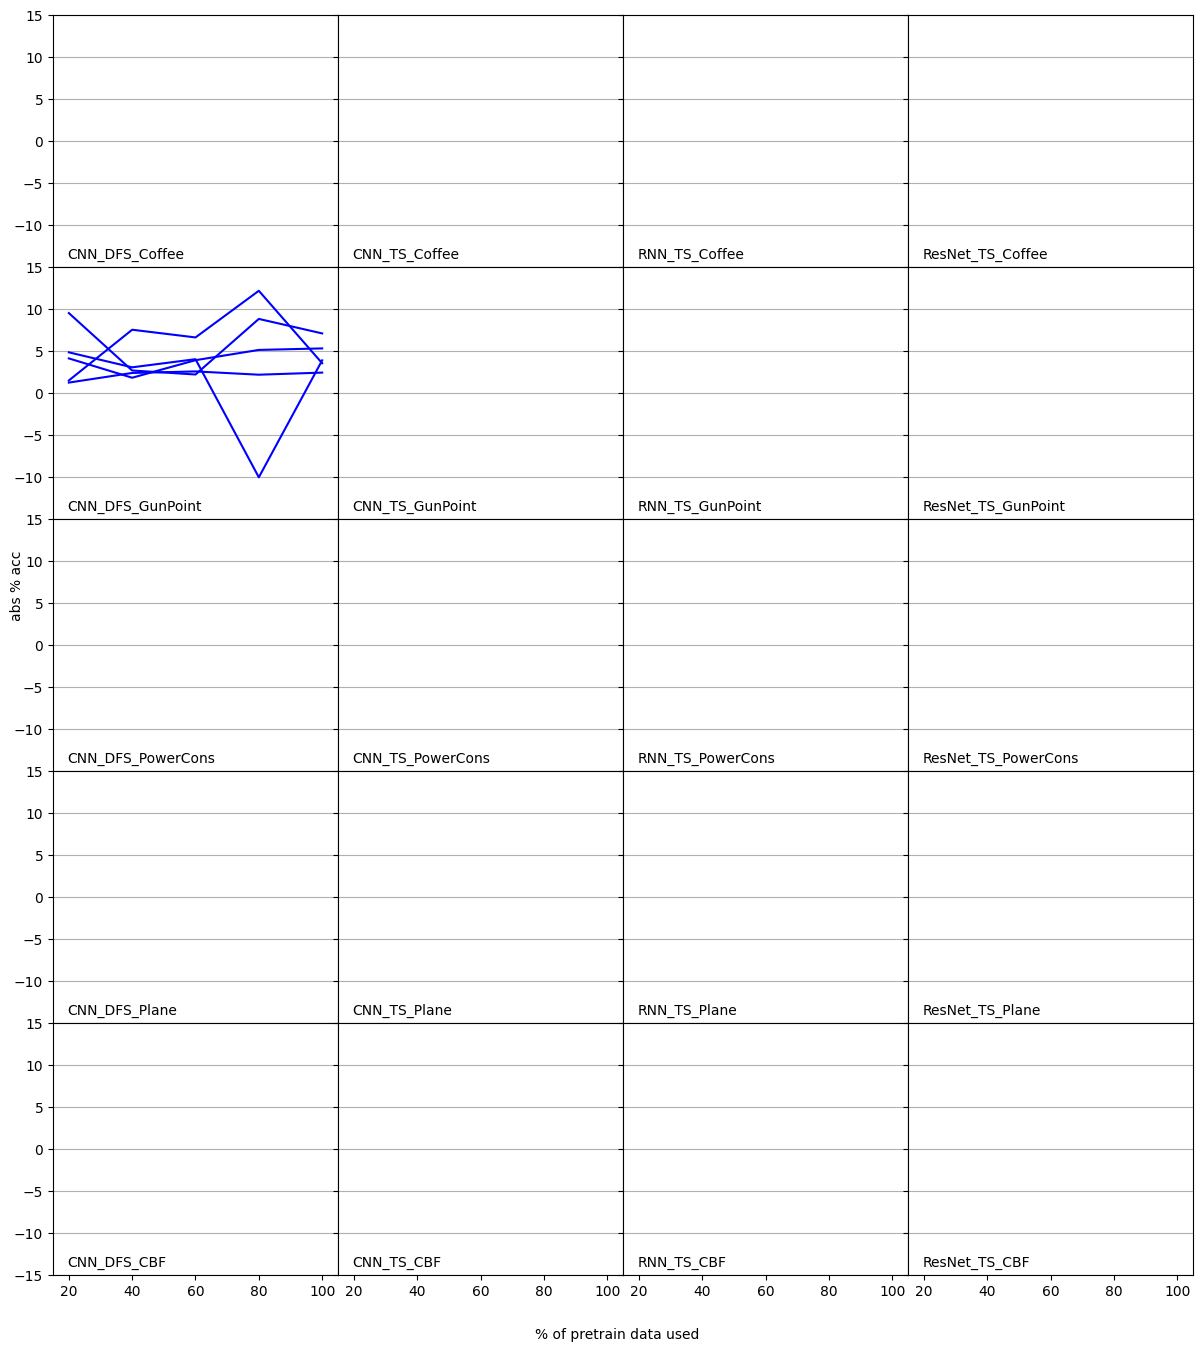

In [8]:
archs = ['CNN_DFS', 'CNN_TS', 'RNN_TS', 'ResNet_TS']
dsets = ['Coffee', 'GunPoint', 'PowerCons', "Plane", "CBF"]

n_rows = len(dsets)
n_cols = len(archs)

fig = plt.figure(figsize=[3*n_cols, 3*n_rows])
gs = fig.add_gridspec(n_rows, n_cols, 
    left=0.03, right=0.98, bottom=0.04,
    wspace=0., hspace=0
    )

metric = "acc"

colors = {
    "GunPoint": "blue",
    "Coffee": "red",
    "PowerCons": "purple",
    "Plane": "green",
    "CBF": "orange"
}

axes: dict[str, plt.Axes] = {}
for i, arch in enumerate(archs):
    for j, dset in enumerate(dsets):
        axes[f"{arch}_{dset}"] = fig.add_subplot(gs[j,i])

for arch_dset in axes:
    
    ax = axes[arch_dset]
    
    ax.set_xlim(15, 105)
    ax.set_xticks(np.arange(20,101,20))

    ax.set_ylim(-15, 15)
    
    ax.grid(axis="y")

    if archs[0] not in arch_dset:
        ax.set_yticklabels([])

    if dsets[-1] not in arch_dset:
        ax.set_yticks([-10, -5, 0, 5, 10, 15])
        ax.set_xticklabels([])
    else:
        ax.set_yticks([-15, -10, -5, 0, 5, 10, 15])

    ax.annotate(arch_dset, (0.05, 0.05), xycoords='axes fraction', va='center')


for (arch, dset, nsamp_tra), dfg in dfpb.groupby(["arch", "dataset", "nsamp_tra"]):
    x_values = [20, 40, 60, 80, 100]
    axes[f"{arch}_{dset}"].errorbar(x_values[:len(dfg)], dfg[f"target_test_{metric}_mean"]*100, 
        #yerr=dfg[f"target_test_{metric}_std"],         
        label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[dset])

for (arch, dset), dfg in dfpb.groupby(["arch", "dataset"]):
    x_values = [20, 40, 60, 80, 100]
    data = dfg.groupby("nsamp_pre").apply(lambda x: np.average(x[f"target_test_{metric}_mean"], weights=x[f"target_test_{metric}_std"]))
    axes[f"{arch}_{dset}"].errorbar(x_values[:len(dfg)], data*100, 
        #yerr=dfg[f"target_test_{metric}_std"],         
        label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c="black", lw=5)


fig.text(0,0.5, s= f"abs % {metric}", rotation="vertical", ha="center", va="center");
fig.text(0.5,0, s= "% of pretrain data used", rotation="horizontal", ha="center", va="center");

    
print(dfpb.groupby(["arch", "dataset"]).last()[f"target_test_{metric}_mean"])